In [1]:
# Parameters
file_path = "AAPL.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,178.520004,181.550003,178.330002,181.119995,180.197906,52722800
1,2023-08-24,180.669998,181.100006,176.009995,176.380005,175.482056,54945800
2,2023-08-25,177.380005,179.149994,175.820007,178.610001,177.700684,51449600
3,2023-08-28,180.089996,180.589996,178.550003,180.190002,179.272644,43820700
4,2023-08-29,179.699997,184.899994,179.500000,184.119995,183.182617,53003900
...,...,...,...,...,...,...,...
247,2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200
248,2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800
249,2024-08-20,225.770004,227.169998,225.449997,226.509995,226.509995,30299000
250,2024-08-21,226.520004,227.979996,225.050003,226.399994,226.399994,34765500


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,181.119995
1,2023-08-24,176.380005
2,2023-08-25,178.610001
3,2023-08-28,180.190002
4,2023-08-29,184.119995
...,...,...
247,2024-08-16,226.050003
248,2024-08-19,225.889999
249,2024-08-20,226.509995
250,2024-08-21,226.399994


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_88357/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,181.119995
2023-08-24,176.380005
2023-08-25,178.610001
2023-08-28,180.190002
2023-08-29,184.119995
...,...
2024-08-16,226.050003
2024-08-19,225.889999
2024-08-20,226.509995


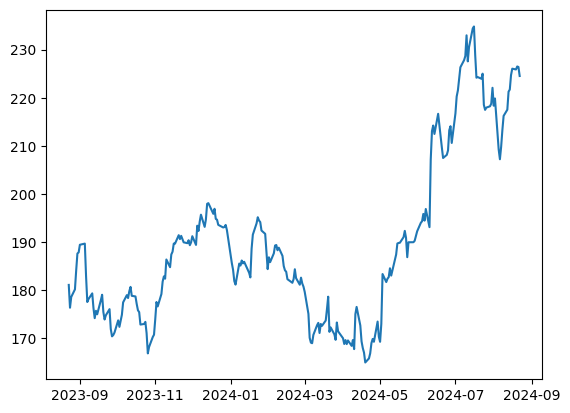

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,181.119995,176.380005,178.610001,180.190002,184.119995,187.649994,187.869995,189.460007,189.699997,...,174.789993,176.080002,171.960007,170.429993,170.690002,171.210007,173.750000,172.399994,173.660004,174.910004
1,2023-10-06,176.380005,178.610001,180.190002,184.119995,187.649994,187.869995,189.460007,189.699997,182.910004,...,176.080002,171.960007,170.429993,170.690002,171.210007,173.750000,172.399994,173.660004,174.910004,177.490005
2,2023-10-09,178.610001,180.190002,184.119995,187.649994,187.869995,189.460007,189.699997,182.910004,177.559998,...,171.960007,170.429993,170.690002,171.210007,173.750000,172.399994,173.660004,174.910004,177.490005,178.990005
3,2023-10-10,180.190002,184.119995,187.649994,187.869995,189.460007,189.699997,182.910004,177.559998,178.179993,...,170.429993,170.690002,171.210007,173.750000,172.399994,173.660004,174.910004,177.490005,178.990005,178.389999
4,2023-10-11,184.119995,187.649994,187.869995,189.460007,189.699997,182.910004,177.559998,178.179993,179.360001,...,170.690002,171.210007,173.750000,172.399994,173.660004,174.910004,177.490005,178.990005,178.389999,179.800003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,226.339996,227.820007,228.679993,232.979996,227.570007,230.539993,234.399994,234.820007,228.880005,...,209.270004,207.229996,209.820007,213.309998,216.240005,217.529999,221.270004,221.720001,224.720001,226.050003
218,2024-08-19,227.820007,228.679993,232.979996,227.570007,230.539993,234.399994,234.820007,228.880005,224.179993,...,207.229996,209.820007,213.309998,216.240005,217.529999,221.270004,221.720001,224.720001,226.050003,225.889999
219,2024-08-20,228.679993,232.979996,227.570007,230.539993,234.399994,234.820007,228.880005,224.179993,224.309998,...,209.820007,213.309998,216.240005,217.529999,221.270004,221.720001,224.720001,226.050003,225.889999,226.509995
220,2024-08-21,232.979996,227.570007,230.539993,234.399994,234.820007,228.880005,224.179993,224.309998,223.960007,...,213.309998,216.240005,217.529999,221.270004,221.720001,224.720001,226.050003,225.889999,226.509995,226.399994


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

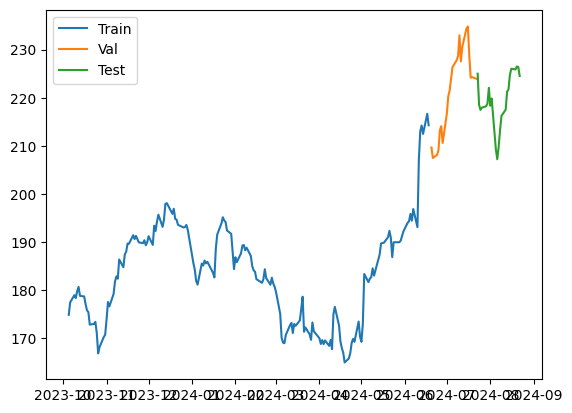

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 769ms/step - loss: 34229.9609 - mean_absolute_error: 184.5043

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 33585.2227 - mean_absolute_error: 182.8870 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 33511.0430 - mean_absolute_error: 182.7044 - val_loss: 47753.4375 - val_mean_absolute_error: 218.3464


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 33252.0469 - mean_absolute_error: 181.9754

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 32356.1387 - mean_absolute_error: 179.5363

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 32189.3984 - mean_absolute_error: 179.0764 - val_loss: 44613.8555 - val_mean_absolute_error: 211.0328


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 29128.7090 - mean_absolute_error: 170.4485

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 29206.6133 - mean_absolute_error: 170.6255

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 29145.9863 - mean_absolute_error: 170.4301

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 28815.3848 - mean_absolute_error: 169.4310

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 28538.5918 - mean_absolute_error: 168.5882 - val_loss: 36774.8906 - val_mean_absolute_error: 191.5515


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 24182.3926 - mean_absolute_error: 155.1874

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 22884.3691 - mean_absolute_error: 150.7806

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 21724.1309 - mean_absolute_error: 146.6826

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 20869.8711 - mean_absolute_error: 143.5544 - val_loss: 19905.7871 - val_mean_absolute_error: 140.7656


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9732.1523 - mean_absolute_error: 98.0590

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7906.0093 - mean_absolute_error: 87.1417

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6551.5479 - mean_absolute_error: 76.1733 - val_loss: 698.9277 - val_mean_absolute_error: 24.1345


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 901.6393 - mean_absolute_error: 27.6748

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1589.0822 - mean_absolute_error: 36.6622

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1890.7225 - mean_absolute_error: 40.3832 - val_loss: 96.4024 - val_mean_absolute_error: 8.9131


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1961.4597 - mean_absolute_error: 42.3180

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1347.6539 - mean_absolute_error: 33.2420

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1063.0856 - mean_absolute_error: 27.9896 - val_loss: 2937.2664 - val_mean_absolute_error: 53.4309


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 360.7275 - mean_absolute_error: 15.8434

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 474.9527 - mean_absolute_error: 18.6627

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 504.4745 - mean_absolute_error: 19.4294 - val_loss: 3894.3743 - val_mean_absolute_error: 61.7547


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 830.6866 - mean_absolute_error: 26.5422

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 600.9965 - mean_absolute_error: 21.4574

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 542.8336 - mean_absolute_error: 20.0019 - val_loss: 1619.5060 - val_mean_absolute_error: 39.2287


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 97.1646 - mean_absolute_error: 7.5251

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 119.9801 - mean_absolute_error: 8.3988

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 132.1591 - mean_absolute_error: 8.8144 - val_loss: 779.5792 - val_mean_absolute_error: 26.4408


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 234.2039 - mean_absolute_error: 12.4770

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 217.9577 - mean_absolute_error: 12.0242

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 213.5910 - mean_absolute_error: 11.9087 - val_loss: 1447.2799 - val_mean_absolute_error: 36.9830


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 90.7615 - mean_absolute_error: 7.5563

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 111.3596 - mean_absolute_error: 8.6499

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 121.3337 - mean_absolute_error: 9.0042 - val_loss: 2164.1904 - val_mean_absolute_error: 45.6633


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 160.3370 - mean_absolute_error: 10.7318

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 165.6434 - mean_absolute_error: 10.6004

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 157.4469 - mean_absolute_error: 10.3178 - val_loss: 1625.9183 - val_mean_absolute_error: 39.3318


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 190.3751 - mean_absolute_error: 11.1961

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 167.5596 - mean_absolute_error: 10.3710

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 158.8030 - mean_absolute_error: 10.0657

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 151.0356 - mean_absolute_error: 9.7922 

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 144.3495 - mean_absolute_error: 9.5686

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 137.8312 - mean_absolute_error: 9.3782 - val_loss: 1275.4491 - val_mean_absolute_error: 34.5919


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 93.9934 - mean_absolute_error: 7.9446

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 103.4620 - mean_absolute_error: 8.0411

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 110.5815 - mean_absolute_error: 8.3469

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 113.9699 - mean_absolute_error: 8.4992 - val_loss: 1575.4528 - val_mean_absolute_error: 38.6869


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 121.7796 - mean_absolute_error: 8.0931

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 119.7869 - mean_absolute_error: 8.7044

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 118.2993 - mean_absolute_error: 8.7376 - val_loss: 1706.1669 - val_mean_absolute_error: 40.3415


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 101.0895 - mean_absolute_error: 9.1904

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 106.7242 - mean_absolute_error: 8.9685

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 110.2367 - mean_absolute_error: 8.9128 - val_loss: 1559.1187 - val_mean_absolute_error: 38.4763


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 155.7428 - mean_absolute_error: 10.1210

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 130.4068 - mean_absolute_error: 9.2421 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 126.1277 - mean_absolute_error: 9.0685 - val_loss: 1367.6407 - val_mean_absolute_error: 35.9025


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 133.7762 - mean_absolute_error: 9.3883

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 122.5917 - mean_absolute_error: 9.0123

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 120.5314 - mean_absolute_error: 8.9322 - val_loss: 1606.2922 - val_mean_absolute_error: 39.0889


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 147.3553 - mean_absolute_error: 9.8452

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 110.6801 - mean_absolute_error: 8.4811

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 111.2620 - mean_absolute_error: 8.5487 - val_loss: 1572.5872 - val_mean_absolute_error: 38.6567


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 124.3446 - mean_absolute_error: 9.2789

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 107.3962 - mean_absolute_error: 8.5542

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 108.9540 - mean_absolute_error: 8.5879 - val_loss: 1465.5687 - val_mean_absolute_error: 37.2486


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 123.5732 - mean_absolute_error: 8.7868

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 114.4539 - mean_absolute_error: 8.7440

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 114.1045 - mean_absolute_error: 8.7302 - val_loss: 1596.9380 - val_mean_absolute_error: 38.9755


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 139.7137 - mean_absolute_error: 9.4066

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 120.5280 - mean_absolute_error: 8.8807

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 118.1120 - mean_absolute_error: 8.8236 - val_loss: 1507.3481 - val_mean_absolute_error: 37.8124


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 83.6239 - mean_absolute_error: 7.1171

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 105.5633 - mean_absolute_error: 8.2355

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 106.6680 - mean_absolute_error: 8.3252 - val_loss: 1510.0918 - val_mean_absolute_error: 37.8620


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 110.8580 - mean_absolute_error: 8.3216

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 98.1204 - mean_absolute_error: 7.9705 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 100.9508 - mean_absolute_error: 8.1156 - val_loss: 1435.0304 - val_mean_absolute_error: 36.8549


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 91.5625 - mean_absolute_error: 8.6697

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 95.3824 - mean_absolute_error: 8.3157

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 97.7930 - mean_absolute_error: 8.3003 - val_loss: 1449.2899 - val_mean_absolute_error: 37.0627


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.0044 - mean_absolute_error: 7.1225

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 90.2166 - mean_absolute_error: 7.8695

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 94.1948 - mean_absolute_error: 8.0043

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 98.1427 - mean_absolute_error: 8.1481 - val_loss: 1456.9611 - val_mean_absolute_error: 37.1583


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 111.3584 - mean_absolute_error: 8.9440

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 99.6796 - mean_absolute_error: 8.4444 

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 105.4404 - mean_absolute_error: 8.5310

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 105.8998 - mean_absolute_error: 8.5068 - val_loss: 1426.0734 - val_mean_absolute_error: 36.7540


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 128.5129 - mean_absolute_error: 9.4823

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 116.9027 - mean_absolute_error: 8.8651

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 113.8308 - mean_absolute_error: 8.7223 - val_loss: 1450.0411 - val_mean_absolute_error: 37.0997


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 67.6787 - mean_absolute_error: 6.9047

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.7658 - mean_absolute_error: 7.7223

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 92.0393 - mean_absolute_error: 7.9112 - val_loss: 1390.6560 - val_mean_absolute_error: 36.2758


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 76.5440 - mean_absolute_error: 7.6187

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 88.5998 - mean_absolute_error: 7.9466

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 95.4630 - mean_absolute_error: 8.1035 - val_loss: 1424.7396 - val_mean_absolute_error: 36.7613


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 108.3023 - mean_absolute_error: 8.2891

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 107.9719 - mean_absolute_error: 8.4229

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 106.0756 - mean_absolute_error: 8.3572 - val_loss: 1407.2518 - val_mean_absolute_error: 36.5395


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 89.1990 - mean_absolute_error: 7.0753

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 92.5767 - mean_absolute_error: 7.5522

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 94.7640 - mean_absolute_error: 7.7205 - val_loss: 1399.8077 - val_mean_absolute_error: 36.4558


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 61.6371 - mean_absolute_error: 6.3329

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 79.0865 - mean_absolute_error: 7.3438

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.4876 - mean_absolute_error: 7.5641 - val_loss: 1260.0046 - val_mean_absolute_error: 34.4787


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 96.1223 - mean_absolute_error: 7.6313

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 100.5891 - mean_absolute_error: 7.9888

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 98.3741 - mean_absolute_error: 7.9392 - val_loss: 1357.5265 - val_mean_absolute_error: 35.9298


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 98.3779 - mean_absolute_error: 8.0398

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 95.6039 - mean_absolute_error: 7.9884

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 93.2893 - mean_absolute_error: 7.8749 - val_loss: 1089.3624 - val_mean_absolute_error: 31.9784


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 66.4177 - mean_absolute_error: 7.0772

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.1813 - mean_absolute_error: 7.0654

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.4899 - mean_absolute_error: 7.1733 - val_loss: 1146.8800 - val_mean_absolute_error: 32.9244


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 91.9458 - mean_absolute_error: 7.4011

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 81.4709 - mean_absolute_error: 7.1640

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.5710 - mean_absolute_error: 7.1063 - val_loss: 994.1244 - val_mean_absolute_error: 30.4791


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 98.8527 - mean_absolute_error: 7.7154

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.5421 - mean_absolute_error: 7.0013

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.0432 - mean_absolute_error: 6.9418 - val_loss: 1102.1869 - val_mean_absolute_error: 32.2649


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 53.9547 - mean_absolute_error: 5.7996

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.3067 - mean_absolute_error: 6.2138

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 61.1782 - mean_absolute_error: 6.3552 - val_loss: 912.4290 - val_mean_absolute_error: 29.1956


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 56.9074 - mean_absolute_error: 6.7940

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 62.0580 - mean_absolute_error: 6.6587

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63.0933 - mean_absolute_error: 6.6343 - val_loss: 908.4765 - val_mean_absolute_error: 29.0692


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42.1293 - mean_absolute_error: 5.7397

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.8898 - mean_absolute_error: 6.3197

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58.7303 - mean_absolute_error: 6.3294 - val_loss: 998.0419 - val_mean_absolute_error: 30.6523


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 33.1452 - mean_absolute_error: 4.6985

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 56.5615 - mean_absolute_error: 5.7287

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 56.5756 - mean_absolute_error: 5.7460 - val_loss: 722.9120 - val_mean_absolute_error: 25.6453


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 41.5283 - mean_absolute_error: 5.2014

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.3345 - mean_absolute_error: 5.6422

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50.6732 - mean_absolute_error: 5.6980 - val_loss: 818.9562 - val_mean_absolute_error: 27.5425


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 35.2771 - mean_absolute_error: 4.6691

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.4605 - mean_absolute_error: 4.9653

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 40.8046 - mean_absolute_error: 5.0468 - val_loss: 780.8412 - val_mean_absolute_error: 26.8584


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 45.1276 - mean_absolute_error: 5.1496

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 40.6553 - mean_absolute_error: 4.9511

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 40.2418 - mean_absolute_error: 4.9462 - val_loss: 692.3526 - val_mean_absolute_error: 25.1202


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 19.2882 - mean_absolute_error: 3.6376

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.3162 - mean_absolute_error: 4.2073

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.8601 - mean_absolute_error: 4.2903 - val_loss: 733.5919 - val_mean_absolute_error: 25.9940


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42.6582 - mean_absolute_error: 4.8596

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.5776 - mean_absolute_error: 4.4893

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 33.4368 - mean_absolute_error: 4.4380 - val_loss: 526.3516 - val_mean_absolute_error: 21.5932


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21.8034 - mean_absolute_error: 3.5090

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25.1166 - mean_absolute_error: 3.8252

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.8978 - mean_absolute_error: 3.8757 - val_loss: 514.0289 - val_mean_absolute_error: 21.3590


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 36.0401 - mean_absolute_error: 4.6487

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.0321 - mean_absolute_error: 4.5286

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.3963 - mean_absolute_error: 4.4228 - val_loss: 466.7411 - val_mean_absolute_error: 20.2673


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 24.0813 - mean_absolute_error: 3.9480

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.2686 - mean_absolute_error: 3.6720

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.3784 - mean_absolute_error: 3.6688 - val_loss: 417.8993 - val_mean_absolute_error: 19.0367


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.7479 - mean_absolute_error: 3.1370

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.4309 - mean_absolute_error: 3.1597

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.0287 - mean_absolute_error: 3.1187 - val_loss: 413.7223 - val_mean_absolute_error: 18.9965


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.7902 - mean_absolute_error: 2.8757

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.4606 - mean_absolute_error: 2.9478

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.4370 - mean_absolute_error: 2.9419 - val_loss: 360.7360 - val_mean_absolute_error: 17.5360


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.7743 - mean_absolute_error: 3.0341

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.2134 - mean_absolute_error: 3.4793

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.9743 - mean_absolute_error: 3.4524 - val_loss: 399.9383 - val_mean_absolute_error: 18.7651


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 20.8855 - mean_absolute_error: 3.9148

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.9613 - mean_absolute_error: 3.6524

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.5806 - mean_absolute_error: 3.5803 - val_loss: 374.2650 - val_mean_absolute_error: 18.0704


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.0841 - mean_absolute_error: 2.7062

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.5292 - mean_absolute_error: 2.7195

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.9992 - mean_absolute_error: 2.7330 - val_loss: 344.3760 - val_mean_absolute_error: 17.2433


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.3811 - mean_absolute_error: 2.8604

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.4539 - mean_absolute_error: 2.7619

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.6742 - mean_absolute_error: 2.7619 - val_loss: 290.7185 - val_mean_absolute_error: 15.5387


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.8115 - mean_absolute_error: 2.0955

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1687 - mean_absolute_error: 2.3382

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.6529 - mean_absolute_error: 2.4024 - val_loss: 264.4174 - val_mean_absolute_error: 14.7167


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.2029 - mean_absolute_error: 3.0056

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.2895 - mean_absolute_error: 2.7062

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.2063 - mean_absolute_error: 2.7026 - val_loss: 237.4616 - val_mean_absolute_error: 13.8708


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.8303 - mean_absolute_error: 3.2057

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.7028 - mean_absolute_error: 2.5869

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.4576 - mean_absolute_error: 2.5406 - val_loss: 227.0523 - val_mean_absolute_error: 13.4567


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8439 - mean_absolute_error: 1.6695

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.3796 - mean_absolute_error: 2.1692

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.7148 - mean_absolute_error: 2.2106 - val_loss: 200.8495 - val_mean_absolute_error: 12.5114


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.7755 - mean_absolute_error: 2.5391

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.5393 - mean_absolute_error: 2.4195

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.3208 - mean_absolute_error: 2.3849 - val_loss: 182.0598 - val_mean_absolute_error: 11.7839


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.9815 - mean_absolute_error: 1.6373

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.3912 - mean_absolute_error: 1.9637

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.8398 - mean_absolute_error: 2.0201 - val_loss: 154.3707 - val_mean_absolute_error: 10.5647


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14.2015 - mean_absolute_error: 3.0013

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.7745 - mean_absolute_error: 2.6102

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.1333 - mean_absolute_error: 2.5283 - val_loss: 138.0276 - val_mean_absolute_error: 9.9212


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.1465 - mean_absolute_error: 2.7057

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.8773 - mean_absolute_error: 2.5024

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.5624 - mean_absolute_error: 2.5883 - val_loss: 135.3335 - val_mean_absolute_error: 9.8876


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8524 - mean_absolute_error: 2.2123

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.8286 - mean_absolute_error: 2.7551

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.7580 - mean_absolute_error: 2.8626 - val_loss: 154.5762 - val_mean_absolute_error: 10.9133


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.6753 - mean_absolute_error: 2.2963

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.2523 - mean_absolute_error: 3.0332

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.2835 - mean_absolute_error: 3.0781 - val_loss: 169.4726 - val_mean_absolute_error: 11.6656


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.3859 - mean_absolute_error: 2.3437

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.1431 - mean_absolute_error: 2.8229

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.3228 - mean_absolute_error: 2.8586 - val_loss: 147.3746 - val_mean_absolute_error: 10.5737


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6973 - mean_absolute_error: 2.0885

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.5325 - mean_absolute_error: 2.5576

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.5602 - mean_absolute_error: 2.5660 - val_loss: 143.2270 - val_mean_absolute_error: 10.3969


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.3496 - mean_absolute_error: 1.9844

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.3634 - mean_absolute_error: 2.0506 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.1916 - mean_absolute_error: 2.0802 - val_loss: 135.6826 - val_mean_absolute_error: 10.0248


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.4868 - mean_absolute_error: 1.9739

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.6223 - mean_absolute_error: 2.0235

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.1192 - mean_absolute_error: 2.0859 - val_loss: 133.7139 - val_mean_absolute_error: 9.9898


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.3783 - mean_absolute_error: 1.8071

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.7839 - mean_absolute_error: 2.1924

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3449 - mean_absolute_error: 2.2695 - val_loss: 128.8293 - val_mean_absolute_error: 9.7995


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.1921 - mean_absolute_error: 2.1613

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.9405 - mean_absolute_error: 2.3324

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.9813 - mean_absolute_error: 2.3402 - val_loss: 122.7585 - val_mean_absolute_error: 9.5496


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.2926 - mean_absolute_error: 1.9418

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1426 - mean_absolute_error: 2.2599

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3621 - mean_absolute_error: 2.3003 - val_loss: 108.9400 - val_mean_absolute_error: 8.9154


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.8007 - mean_absolute_error: 2.5091

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.4569 - mean_absolute_error: 2.4183

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0017 - mean_absolute_error: 2.3751 - val_loss: 102.1384 - val_mean_absolute_error: 8.6036


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.1362 - mean_absolute_error: 1.8313

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2652 - mean_absolute_error: 2.0587

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4089 - mean_absolute_error: 2.0534 - val_loss: 84.9813 - val_mean_absolute_error: 7.8195


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.5512 - mean_absolute_error: 3.2870

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.0647 - mean_absolute_error: 2.8246

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.6523 - mean_absolute_error: 2.7463 - val_loss: 83.4672 - val_mean_absolute_error: 7.7602


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6165 - mean_absolute_error: 2.5123

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.2013 - mean_absolute_error: 2.3757

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.0042 - mean_absolute_error: 2.3182 - val_loss: 88.8483 - val_mean_absolute_error: 8.0164


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.2184 - mean_absolute_error: 2.1741

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.0984 - mean_absolute_error: 2.0319

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.2511 - mean_absolute_error: 2.0233 - val_loss: 81.1479 - val_mean_absolute_error: 7.6654


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.3458 - mean_absolute_error: 2.4607

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.5943 - mean_absolute_error: 2.5202

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.2397 - mean_absolute_error: 2.4725 - val_loss: 74.0500 - val_mean_absolute_error: 7.3294


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.7522 - mean_absolute_error: 2.0206

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.7355 - mean_absolute_error: 2.1013

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8465 - mean_absolute_error: 2.1045 - val_loss: 77.9794 - val_mean_absolute_error: 7.5264


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.9956 - mean_absolute_error: 1.6376

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8747 - mean_absolute_error: 1.9563

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.0927 - mean_absolute_error: 1.9865 - val_loss: 71.9268 - val_mean_absolute_error: 7.2357


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6650 - mean_absolute_error: 2.3493

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1373 - mean_absolute_error: 2.2534

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.7544 - mean_absolute_error: 2.1926 - val_loss: 82.9401 - val_mean_absolute_error: 7.8184


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.6019 - mean_absolute_error: 2.0548

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0918 - mean_absolute_error: 2.2576

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.2488 - mean_absolute_error: 2.2753 - val_loss: 84.0027 - val_mean_absolute_error: 7.8843


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6096 - mean_absolute_error: 1.8889

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.0440 - mean_absolute_error: 2.0569

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.9958 - mean_absolute_error: 2.0505 - val_loss: 77.2625 - val_mean_absolute_error: 7.5459


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.1430 - mean_absolute_error: 1.9732

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.9588 - mean_absolute_error: 2.0075 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.2620 - mean_absolute_error: 1.9972 - val_loss: 72.5765 - val_mean_absolute_error: 7.3042


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.3430 - mean_absolute_error: 1.9942

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.7057 - mean_absolute_error: 1.9050

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.9512 - mean_absolute_error: 1.9230 - val_loss: 63.9528 - val_mean_absolute_error: 6.8452


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.9070 - mean_absolute_error: 1.8932

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2290 - mean_absolute_error: 1.8866

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.5432 - mean_absolute_error: 1.9000 - val_loss: 69.2326 - val_mean_absolute_error: 7.1420


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.9051 - mean_absolute_error: 1.9217

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.1166 - mean_absolute_error: 1.9839

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.1229 - mean_absolute_error: 2.0222 - val_loss: 75.4437 - val_mean_absolute_error: 7.5038


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.2106 - mean_absolute_error: 2.2120

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1408 - mean_absolute_error: 2.5204

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.5902 - mean_absolute_error: 2.5677 - val_loss: 87.2562 - val_mean_absolute_error: 8.1518


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.2013 - mean_absolute_error: 2.7088

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.1332 - mean_absolute_error: 2.5952

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.6956 - mean_absolute_error: 2.5637 - val_loss: 83.7956 - val_mean_absolute_error: 7.9650


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.4863 - mean_absolute_error: 2.7633

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.8294 - mean_absolute_error: 2.6065

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.2474 - mean_absolute_error: 2.5746 - val_loss: 81.7977 - val_mean_absolute_error: 7.8463


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.3540 - mean_absolute_error: 2.1246

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.7605 - mean_absolute_error: 2.1749

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6539 - mean_absolute_error: 2.1612 - val_loss: 69.9633 - val_mean_absolute_error: 7.2045


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.2840 - mean_absolute_error: 1.1942

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.5020 - mean_absolute_error: 1.6398

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.7247 - mean_absolute_error: 1.7692 - val_loss: 62.0603 - val_mean_absolute_error: 6.7403


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.3599 - mean_absolute_error: 1.5809

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.7637 - mean_absolute_error: 1.9776

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8821 - mean_absolute_error: 2.0146 - val_loss: 67.1347 - val_mean_absolute_error: 7.0496


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.4777 - mean_absolute_error: 1.8060

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.8013 - mean_absolute_error: 1.8027

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8929 - mean_absolute_error: 1.8291 - val_loss: 58.9506 - val_mean_absolute_error: 6.5747


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.7862 - mean_absolute_error: 2.4574

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0842 - mean_absolute_error: 2.1291 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.5350 - mean_absolute_error: 2.0779 - val_loss: 72.6799 - val_mean_absolute_error: 7.3778


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.8620 - mean_absolute_error: 2.2654

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6734 - mean_absolute_error: 2.0049

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.6129 - mean_absolute_error: 1.9960 - val_loss: 55.5082 - val_mean_absolute_error: 6.3824


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.2848 - mean_absolute_error: 2.1838

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.8173 - mean_absolute_error: 1.9929 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.5774 - mean_absolute_error: 1.9769 - val_loss: 55.1265 - val_mean_absolute_error: 6.3650


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6150 - mean_absolute_error: 1.4821

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0946 - mean_absolute_error: 1.7836

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.3723 - mean_absolute_error: 1.8111 - val_loss: 50.8696 - val_mean_absolute_error: 6.1086


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


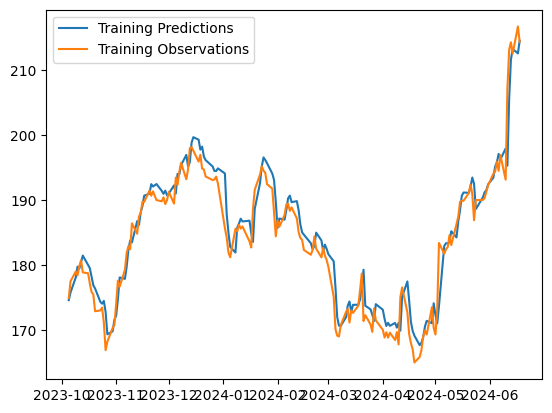

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


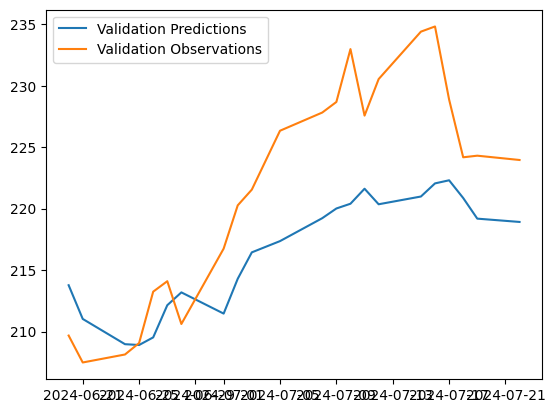

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


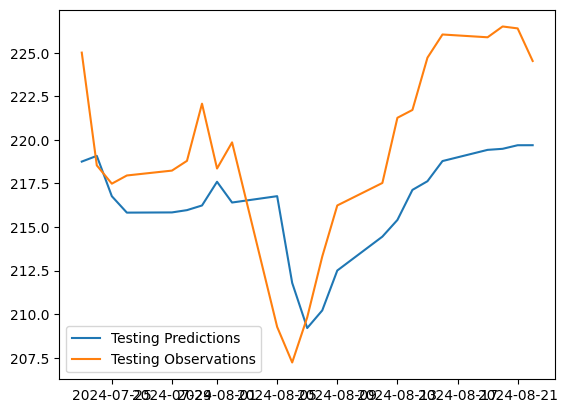

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
